In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/machine_learning/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


çok çok bir aykırı değer olmadığını anlıyorum çünkü veriler arası değerler farkı çok uçuk değil.

In [ ]:
# K-Means
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df) #sadece bağımsız değişkenleri barındırır çünkü unsupervised :)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
kmeans.n_clusters

4

In [ ]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [ ]:
kmeans.labels_ # her bir gözlemin k-means tarafından belirlenen kümeleri

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
kmeans.inertia_ #SSE SSD SSR a karşılık gelen değer(en yakın clustera olan uzaklıklar)

3.6834561535859134

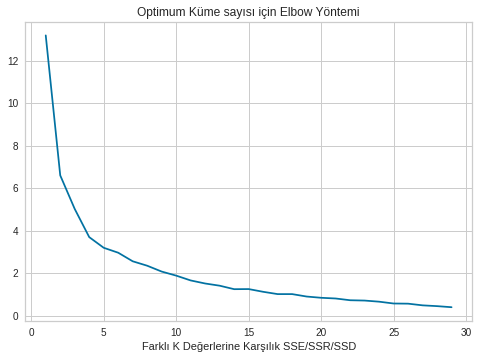

In [ ]:
# Optimum Küme Sayısının Belirlenmesi
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

elbow yöntemi sadece bir ön fikir elde etmeye yarar, kaç kümeye ayıracağın senin iş bilgine bağlı olarak şekillenmelidir.

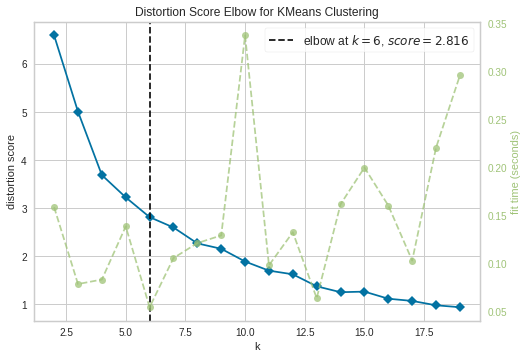

In [ ]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [ ]:
elbow.elbow_value_

6

In [ ]:
# Final Cluster'ların Oluşturulması
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

print(kmeans.n_clusters)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(df[0:5])

6
[[0.13805221 0.10616438 0.34039548 0.1171404 ]
 [0.54618474 0.68949772 0.86440678 0.61197244]
 [0.25753012 0.26712329 0.83050847 0.24386305]
 [0.67871486 0.81050228 0.6440678  0.74763135]
 [0.37568456 0.37982565 0.54545455 0.35306554]
 [0.83562823 0.70645793 0.37772397 0.37172388]]
[5 3 1 4 1 1 2 4 3 5 2 0 1 4 0 4 4 5 0 3 2 3 0 5 4 0 0 3 0 2 3 1 5 0 2 4 4
 2 2 5 0 5 1 2 0 4 4 0 0 4]
[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]]


Hangi eyalet hangi kümede bilmiyorum. Hem gözlem birimini hem de hangi gözlem nerede bilgisini öğrenmek için aşağıdaki kodları uygulayabilirsin.

In [ ]:
clusters_kmeans = kmeans.labels_

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/machine_learning/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
df["cluster"] = clusters_kmeans

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,1


In [ ]:
df["cluster"] = df["cluster"] + 1

In [ ]:
df[df["cluster"]==1]

,Murder,Assault,UrbanPop,Rape,cluster
Idaho,2.6,120,54,14.2,1
Iowa,2.2,56,57,11.3,1
Maine,2.1,83,51,7.8,1
Minnesota,2.7,72,66,14.9,1
Montana,6.0,109,53,16.4,1
Nebraska,4.3,102,62,16.5,1
New Hampshire,2.1,57,56,9.5,1
North Dakota,0.8,45,44,7.3,1
South Dakota,3.8,86,45,12.8,1
Vermont,2.2,48,32,11.2,1


In [ ]:
df[df["cluster"]==5]

,Murder,Assault,UrbanPop,Rape,cluster
Arkansas,8.8,190,50,19.5,5
Delaware,5.9,238,72,15.8,5
Indiana,7.2,113,65,21.0,5
Kansas,6.0,115,66,18.0,5
Kentucky,9.7,109,52,16.3,5
Missouri,9.0,178,70,28.2,5
Oklahoma,6.6,151,68,20.0,5
Oregon,4.9,159,67,29.3,5
Virginia,8.5,156,63,20.7,5
Washington,4.0,145,73,26.2,5


In [ ]:
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1           12   3.091667   2.60      12   76.000000   76.5       12   
2            6   9.866667   9.70       6  246.333333  251.5        6   
3            8   5.075000   4.85       8  123.000000  120.0        8   
4            6  12.066667  11.75       6  281.666667  274.0        6   
5           11   7.036364   6.80      11  155.909091  156.0       11   
6            7  14.671429  14.40       7  251.285714  249.0        7   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        52.083333   53.5    12  11.833333  11.25  
2        83.000000   81.5     6  30.983333  28.55  
3        81.000000   81.5     8  16.737500  17.55  
4        70.000000   72.0     6  36.233333  33.60  
5        64.181818   66.0    11  20.963636  20.00  
6        54.285714   58.0     7  21.685714  22.20

sadece algoritmanın verdiğine bakmak yetmez yorumlamasınıda bilmelisin. Mesela Murder bu veri seti için önemlidir, ortalamalara bakıldığında sanki 1-3 ve 5 clusterları birleştirebiliriz. 

In [ ]:
df.to_csv("clusters.csv")

In [ ]:
# Hierarchical Clustering
df = pd.read_csv("/content/gdrive/My Drive/machine_learning/USArrests.csv", index_col=0)
sc = MinMaxScaler((0, 1))

In [ ]:
df = sc.fit_transform(df)

In [ ]:
hc_average = linkage(df, "average") # linkage birleştirici bir clustering yöntemidir.

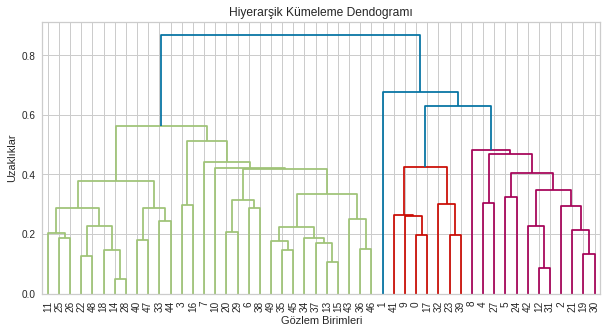

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10) #en aşağıda görülen isimlendirmelerin boyutu
plt.show()

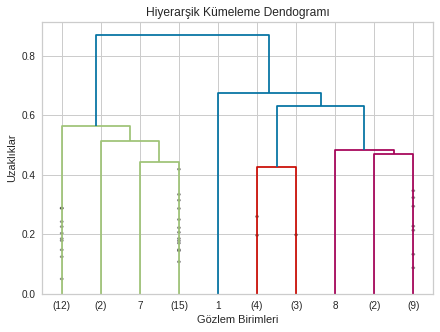

In [ ]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

# hiyerarşik kümeleme yönteminin avantajı gözlem birimlerine genelden bakma imkanı tanır.

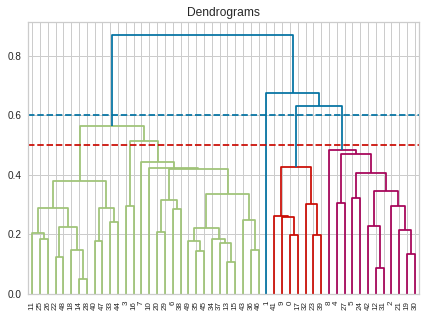

In [ ]:
# Kume Sayısını Belirlemek
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

In [ ]:
# Final Modeli Oluşturmak

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

In [ ]:
clusters = cluster.fit_predict(df)
clusters

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0])

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/machine_learning/USArrests.csv", index_col=0)

In [ ]:
clusters_kmeans = kmeans.labels_

In [ ]:
df["kmeans_cluster_no"] = clusters_kmeans

In [ ]:
df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1

In [ ]:
df["hi_cluster_no"] = clusters

In [ ]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_no,hi_cluster_no
Alabama,13.2,236,58,21.2,6,4
Alaska,10.0,263,48,44.5,4,3
Arizona,8.1,294,80,31.0,2,2
Arkansas,8.8,190,50,19.5,5,1
California,9.0,276,91,40.6,2,2


## Principal Component Analysis

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/machine_learning/hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [ ]:
df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [ ]:
df = df[num_cols]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(322, 16)

In [ ]:
df = StandardScaler().fit_transform(df)

In [ ]:
pca = PCA()
pca_fit = pca.fit_transform(df)

In [ ]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

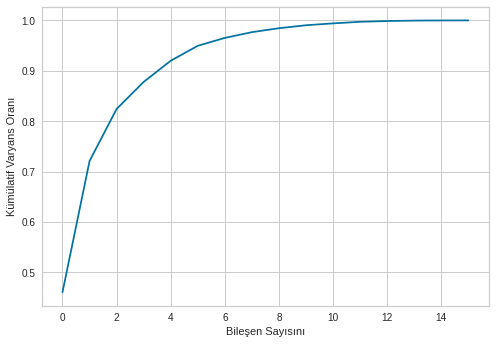

In [ ]:
# Optimum Bileşen Sayısı
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [ ]:
# Final PCA'in Oluşturulması
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

#100 değişken varsa daha az gözlem ile bu veri setini temsil etmek istiyordum. Boyut indirgeme yaptık.

array([0.46037855, 0.72077704, 0.82416565])

# BONUS: Principal Component Regression (PCR)

In [ ]:
#Hitters verisi doğrusal model ile modellenmek istiyor fakat değişkenler arasında çoklu doğrusal 
#bağlantı problemi var. Değişkenler arası yüksek korelasyonu istemeyiz.

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/machine_learning/hitters.csv")
df.shape

(322, 20)

In [ ]:
len(pca_fit) #gözlem birimlerim aynı yerinde.

322

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

#yukarıda 16 değişkeni 3 tane bileşene indirgemiştik.

16

In [ ]:
others = [col for col in df.columns if col not in num_cols]
others

['League', 'Division', 'Salary', 'NewLeague']

In [ ]:
pd.DataFrame(pca_fit, columns = ["PC1","PC2","PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [ ]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [ ]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)

In [ ]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [ ]:
lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

345.60211063519677

In [ ]:
y.mean()

535.9258821292775

In [ ]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

382.4213426426049

In [ ]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [ ]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [ ]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

330.1964109339104

# BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

In [ ]:
# Breast Cancer
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

df = pd.read_csv("/content/gdrive/My Drive/machine_learning/breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

#çok değişkenli bir veriyi iki boyuta indirgemeye çalışacağız.

In [ ]:
df.shape

(569, 32)

In [ ]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [ ]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

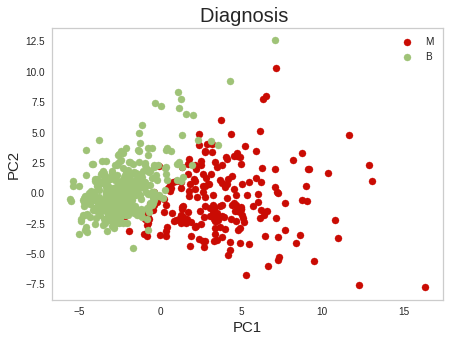

In [ ]:
plot_pca(pca_df, "diagnosis")

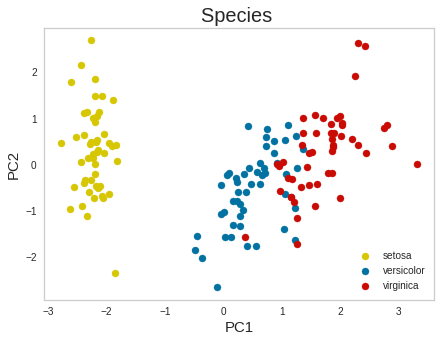

In [ ]:
# Iris
import seaborn as sns
df = sns.load_dataset("iris")

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "species")

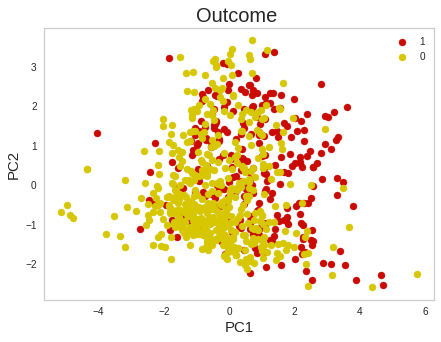

In [ ]:
# Diabetes
df = pd.read_csv("/content/gdrive/My Drive/machine_learning/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")